# Лабораторна робота 4

Автор: Околот Дмитро Олександрович ФІТ 4-10

Був присутній на парі

**Регресійні моделі глибоке дослідження**

In [1]:
!pip install category_encoders


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import PowerTransformer
from scipy.stats import zscore

import category_encoders as ce

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [3]:
# Download latest version
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hellbuoy/car-price-prediction")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'car-price-prediction' dataset.
Path to dataset files: /kaggle/input/car-price-prediction


In [4]:
df = pd.read_csv(os.path.join(path, "CarPrice_Assignment.csv"))
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.drop(['car_ID'], axis=1, inplace=True)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
 # Перевіримо, наскільки розподіл ознаки відхиляється від нормального (симетричного)
df.skew(numeric_only=True)

,0
symboling,0.211072
wheelbase,1.050214
carlength,0.155954
carwidth,0.904003
carheight,0.063123
curbweight,0.681398
enginesize,1.947655
boreratio,0.020156
stroke,-0.689705
compressionratio,2.610862


Дослідження на викиди
Викиди. Це спостереження, що істотно відхиляються від загальної структури даних. Причини: помилки збору/введення, рідкісні (але реальні) події, змішування різних популяцій.
Навіщо досліджувати. У лінійній регресії (MSE) окремі крайні значення можуть «перетягувати» оцінки коефіцієнтів, збільшувати дисперсію й порушувати припущення нормальності/гомоскедастичності; унаслідок цього погіршується узагальнювальна здатність моделі та коректність висновків.
Коли втручатися.
Якщо це явні артефакти/помилки — виправити або вилучити.
Якщо це рідкісні, але валідні події — краще пом’якшити вплив (лог-/Yeo–Johnson трансформації, вінзоризація, порогове «cap»), застосувати робастні методи (Huber/RANSAC, квантильна регресія) або моделі, стійкі до викидів (дерева/бустинг). Для задач виявлення аномалій викиди — це корисний «сигнал», їх зберігають.
Виявлення. Одновимірно: Z-score, IQR (межі Тьюкі), MAD (робастний аналог Z-score); багатовимірно: відстань Махаланобіса (бажано з робастною коваріацією), Isolation Forest/LOF. Пороги розраховуйте на train-вибірці, цільову змінну не включайте.

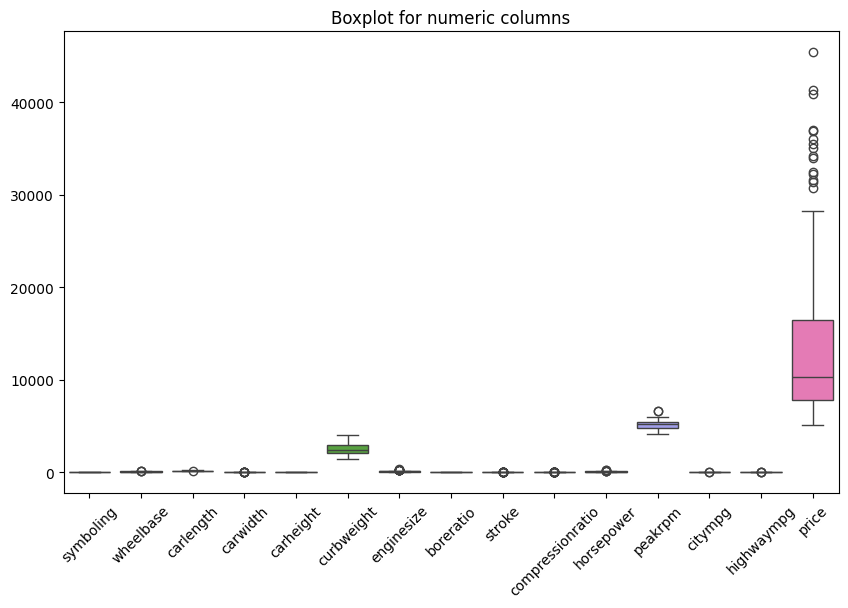

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot for numeric columns")
plt.show()


In [11]:
# Обчислюємо Z-оцінки для всіх числових стовпців
z_scores = zscore(df.select_dtypes(include=['float64', 'int64']))

# Створюємо маску: True для всіх рядків, де Z-score < 3 у всіх стовпцях
mask = (abs(z_scores) < 3).all(axis=1)

# Фільтруємо датафрейм
df = df[mask].copy()

print(f"Було рядків: {len(df)}, після видалення викидів: {len(df)}")


Було рядків: 181, після видалення викидів: 181


In [12]:
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,volvo diesel,gas,turbo,four,wagon,rwd,front,104.3,188.8,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.0
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


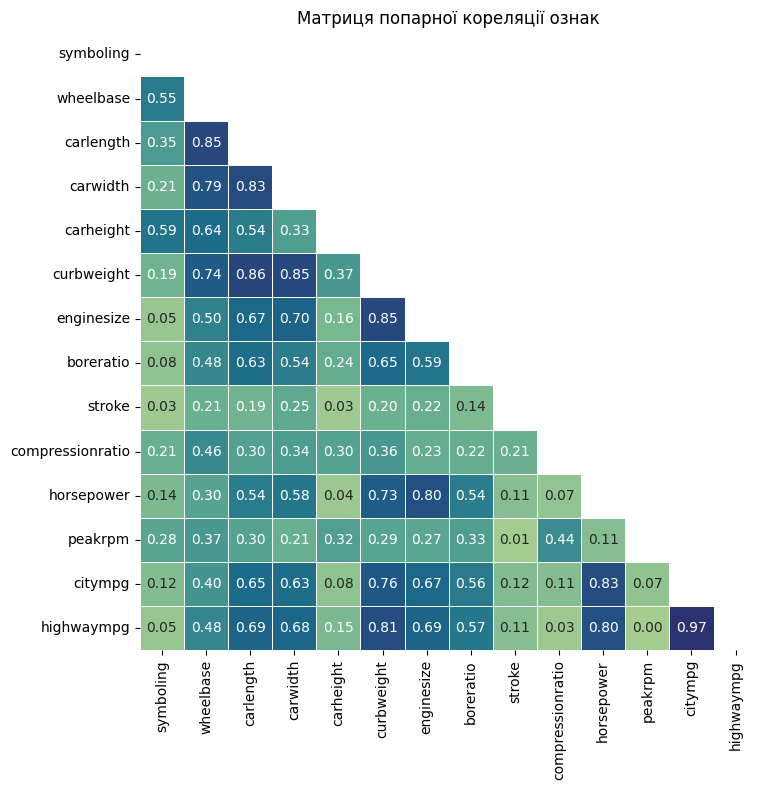

In [13]:
mtx = df.drop('price', axis=1).corr(numeric_only=True).abs()

# Побудова графіка
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(
    mtx,
    cmap='crest',
    annot=True,
    fmt=".2f",
    linewidths=.5,
    mask=np.triu(np.ones_like(mtx, dtype=bool)),  # маскуємо верхню трикутну частину
    square=True,
    cbar=False,
    ax=ax
)

plt.title("Матриця попарної кореляції ознак")
plt.tight_layout()
plt.show()

In [14]:
corr_price = df.corr(numeric_only=True)['price'].abs().sort_values(ascending=False)
corr_price


,price
price,1.000000
enginesize,0.830473
curbweight,0.802365
horsepower,0.792024
carwidth,0.711771
highwaympg,0.708831
citympg,0.702379
carlength,0.638258
boreratio,0.536939
wheelbase,0.499827


In [15]:
to_drop = {'highwaympg', 'wheelbase', 'carlength', 'enginesize'}

present = list(to_drop & set(df.columns))
df1 = df.drop(columns=present).copy()

print("Видалено:", present)
print("Кількість ознак до/після:", df.shape[1], "→", df1.shape[1])


Видалено: ['carlength', 'highwaympg', 'wheelbase', 'enginesize']
Кількість ознак до/після: 25 → 21


In [16]:
df1.select_dtypes(include='object').nunique()

,0
CarName,131
fueltype,2
aspiration,2
doornumber,2
carbody,5
drivewheel,3
enginelocation,2
enginetype,6
cylindernumber,5
fuelsystem,8


In [17]:
# Розділяємо ознаки та цільову змінну
X = df1.drop('price', axis=1)
y = df1['price']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

Для кодування категоріальних ознак використовуємо пакет categorical_encoders, з бібліотеки sklearn. Спочатку відбираємо категоріальні ознаки, а потім навчаємо наш екземпляр об’єкта TargetEncoder(енкодер) та використовуємо його для трансформації категоріальних ознак у тренувальному та тестовому наборах даних.

In [18]:
cat_cols = X_train.select_dtypes(include='object').columns
cat_cols


Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [19]:
encoder = ce.TargetEncoder(cols=cat_cols)

In [20]:
X_train = encoder.fit_transform(X_train, y_train)
X_test = encoder.transform(X_test)

In [21]:
power_transform = PowerTransformer().set_output(transform='pandas')

X_train = power_transform.fit_transform(X_train)
X_test = power_transform.transform(X_test)


/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:188: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [22]:
X_train.skew()

,0
symboling,-0.067462
CarName,0.000000
fueltype,0.000000
aspiration,0.000000
doornumber,-0.312449
carbody,-0.194207
drivewheel,0.494597
enginelocation,0.000000
carwidth,0.000000
carheight,0.000852


In [23]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'SVR': SVR()
}

print("Побудовані моделі:", ", ".join(models.keys()))


Побудовані моделі: LinearRegression, Ridge, Lasso, RandomForestRegressor, GradientBoostingRegressor, SVR


In [24]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = model.score(X_train, y_train)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    results[name] = {
        "model": model,
        "y_pred": y_pred,
        "R²": r2,
        "MAE": mae,
        "MSE": mse
    }

    print(f"[{name}] R²: {r2:.3f} | MAE: {mae:.3f} | MSE: {mse:.3f}")

[LinearRegression] R²: 0.756 | MAE: 2467.290 | MSE: 13973840.132
[Ridge] R²: 0.756 | MAE: 2455.042 | MSE: 13857815.075
[Lasso] R²: 0.756 | MAE: 2465.930 | MSE: 13969760.862
[RandomForestRegressor] R²: 0.994 | MAE: 3830.424 | MSE: 29636091.511
[GradientBoostingRegressor] R²: 0.997 | MAE: 3075.818 | MSE: 22999923.967
[SVR] R²: -0.125 | MAE: 4870.440 | MSE: 52871472.885


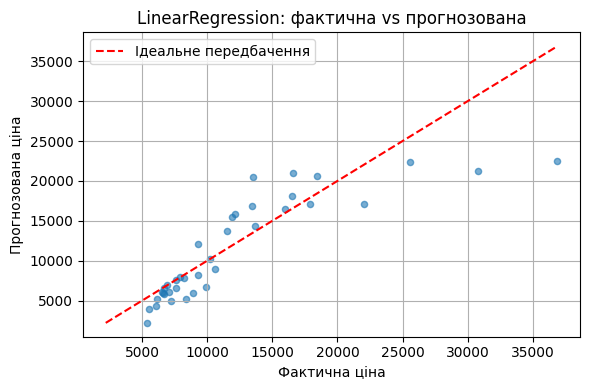

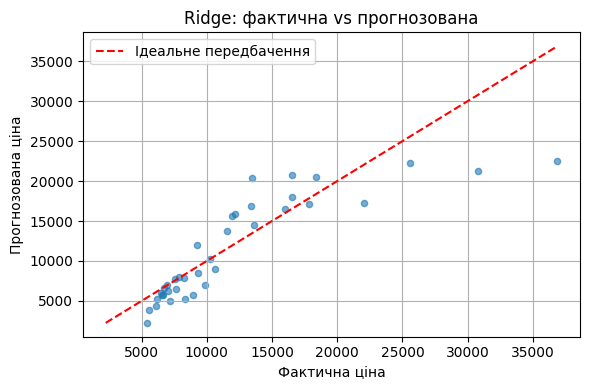

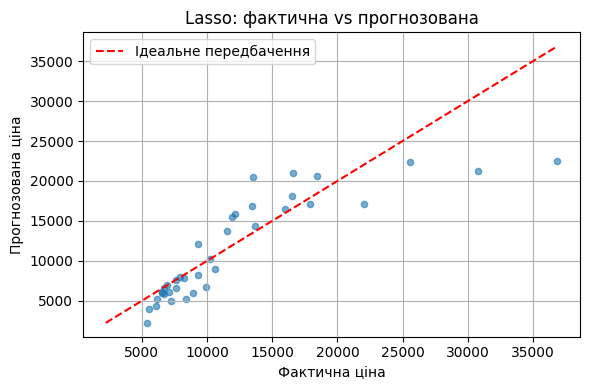

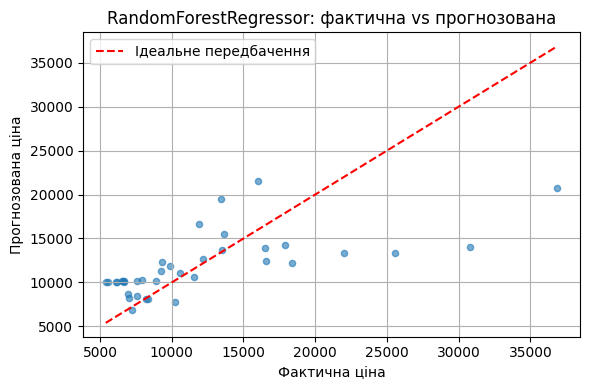

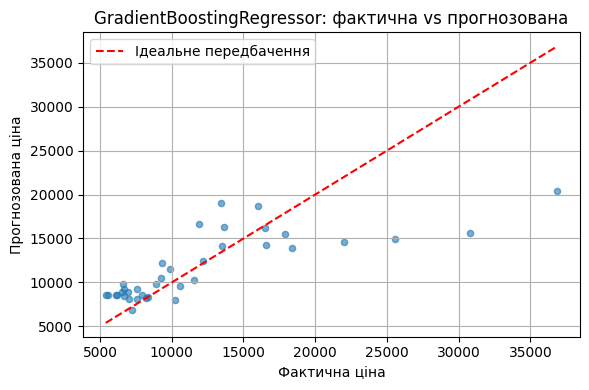

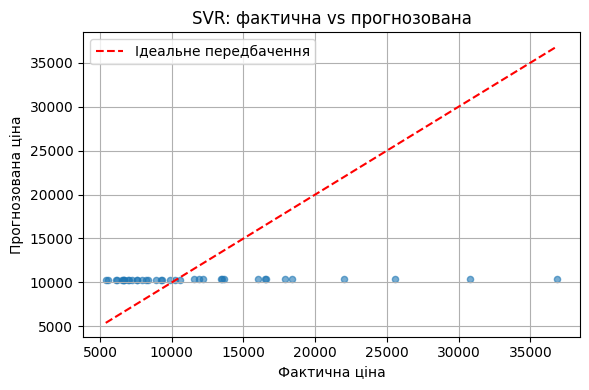

In [25]:
y_true = np.asarray(y_test)
for name, res in results.items():
    y_pred = np.asarray(res["y_pred"]).ravel()
    lo = min(y_true.min(), y_pred.min())
    hi = max(y_true.max(), y_pred.max())

    plt.figure(figsize=(6, 4))
    plt.scatter(y_true, y_pred, s=20, alpha=0.6)
    plt.plot([lo, hi], [lo, hi], 'r--', label='Ідеальне передбачення')
    plt.xlabel("Фактична ціна")
    plt.ylabel("Прогнозована ціна")
    plt.title(f"{name}: фактична vs прогнозована")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [26]:
rf_key = 'RandomForestRegressor' if 'RandomForestRegressor' in results else 'RandomForest'
y_rf = np.asarray(results[rf_key]["y_pred"]).ravel()

# Колонка ідентифікатора: беремо 'car_ID', якщо є, інакше — індекс тесту
if 'car_ID' in X_test.columns:
    id_name = 'car_ID'
    id_series = X_test['car_ID']
else:
    id_name = 'row_id'
    id_series = pd.Series(y_test.index, index=y_test.index)

df_rf = pd.DataFrame({
    id_name: id_series,
    'Actual': y_test,
    'Predicted_RF': y_rf
})
sample_rf = df_rf.sample(n=min(10, len(df_rf)), random_state=42).reset_index(drop=True)
print(sample_rf.to_string(index=False))


 row_id    Actual  Predicted_RF
    139  7053.000      8275.105
    156  6938.000      8734.825
    161  8358.000      8159.240
    196 15985.000     21591.950
     32  5399.000     10037.460
    195 13415.000     19513.330
     26  7609.000     10208.685
     67 25552.000     13402.580
      9 17859.167     14284.390
     57 13645.000     15556.330
